This tutorial briefly introuduce how to simulate the given photonics structure using *EME* and *Runner* class.

In [1]:
from IPython.display import Image
import numpy as np

In [ ]:
# Import dataset based eme
import os
import sys
root_path = os.path.abspath("../..")
em_simulator_path = root_path
print(em_simulator_path)
sys.path.append(em_simulator_path)

import em_simulation as sim


# Import dataset
sample_dataset_path = root_path + "/sample_datasets/Si_rectangular_single_waveguide"
sample_dataset = sim.DataUpdater(sample_dataset_path, is_testmode=True)

# Example of specified geometry class
top_width = 1e-6    # 1um
input_angle = 0
effective_radius = 15e-6    #15 um
bend_angle_deg = 90 # 90 degree bend
p = 0.5     # Euler portion is 0.5
sample_euler_bend = sim.SingleEuler(sample_dataset, top_width, input_angle, effective_radius,bend_angle_deg, p) # Euler bend geometry class

After generate specified geometry instance, we are now ready to calculate scattering matrix. We can simply provide the geometry instance into EME class. Initializing the EME class with geometry instance automatically execute the *calc_output_data()* method of the geometry.

There are two options generating EME.
1. force passive
2. force unitarity

In [3]:
sample_euler_bend_eme = sim.EME(sample_euler_bend, force_unitary=True)

100%|██████████| 43/43 [00:00<00:00, 43126.51it/s]


*EME* class has *calc_Smatrix()* method. It calculates the scattering matrix using the output_data from the geometry instance. But just providing the *EME* instance into *Runner* class automatically run the method, so you don't have to manually execute the method unless you want to check the scattering matrix itself.

In [4]:
sample_euler_bend_runner = sim.Runner(sample_euler_bend_eme)

There are four primary methods in the Runner class:
1. propagate(input_amplitudes)
2. propagate_lumped_smatrix(input_amplitudes)
3. plot_intensity_along_propagation()
4. sweep_geometry_length(length_1, length_2, num_points)

**propagte()**
This method takes a list of input amplitudes (one for each guided mode) and calculates the sectional modal complex amplitudes along the structure. For example, if there are five guided modes at the input port, [1, 0, 0, 0, 0] sets the amplitude of the first mode to 1 and the rest to zero. The order of the modes is based on their effective indices at the input port, and this mode ordering is preserved throughout the simulation—even if mode crossings occur, the initial mode order is maintained at the output port.
Note: At the output port, the mode order does not necessarily follow the effective index, but instead tracks the original input order.


**propagate_lumped_smatrix()** 
This function operates similarly to propagate(), but it only calculates and stores the output port complex amplitudes. This is especially useful for optimization tasks where only the output amplitudes are needed and detailed internal analysis is unnecessary.

**plot_intensity_along_propagation()**
This function visualizes how modal intensity changes along the structure. It can be called after executing propagate().

**sweep_geometry_length()**
This function sweeps the structure length from length_1 to length_2 over a specified number of points. It is particularly useful for taper simulations. Note that this function is valid only when there is no curvature along the structure.

{'prop_lengths': array([ 0.        ,  0.07413377,  0.2224013 ,  0.37066884,  0.51893637,
         0.66720391,  0.81547144,  0.96373898,  1.11200651,  1.26027405,
         1.38383033,  1.53209786,  1.6803654 ,  1.82863293,  1.97690047,
         2.125168  ,  2.27343554,  2.42170307,  2.56997061,  2.69352688,
         2.84179442,  2.99006195,  3.13832949,  3.28659702,  3.43486456,
         3.58313209,  3.73139963,  3.87966716,  4.00322344,  4.15149098,
         4.29975851,  4.44802605,  4.59629358,  4.74456112,  4.89282865,
         5.04109619,  5.18936372,  5.31292   ,  5.46118754,  5.60945507,
         5.75772261,  5.90599014,  6.05425768,  6.20184214,  6.34951452,
         6.49727245,  6.64511385,  6.7930368 ,  6.94103955,  7.08912042,
         7.23727784,  7.38551032,  7.5338164 ,  7.68219472,  7.83064393,
         7.97916277,  8.12775001,  8.27640445,  8.42512495,  8.57391041,
         8.72275975,  8.87167194,  9.02064597,  9.16968088,  9.31877573,
         9.46792961,  9.61714163,  

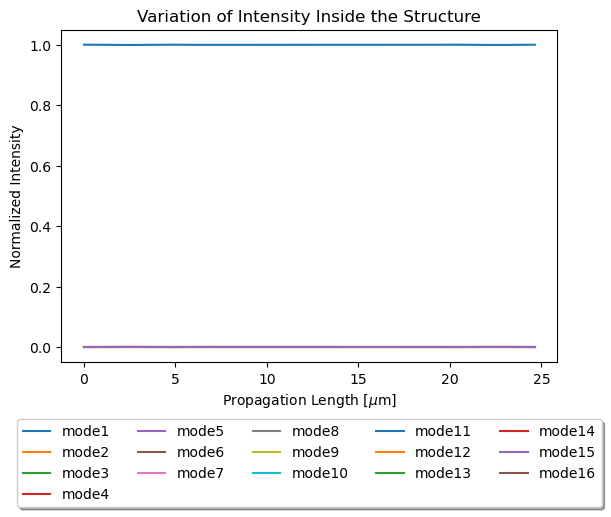

In [5]:
complex_amplitudes = sample_euler_bend_runner.propagate([1,0,0,0,0])
sample_euler_bend_runner.plot_intensity_along_propagation()

In [6]:
# The results of lumped_propagate_smatrix() and propagate() are similar, differing only by the order of numerical error.
end_section_result = complex_amplitudes[-1]
lumped_propagate_result = sample_euler_bend_runner.propagate_lumped_smatrix([1,0,0,0,0])

difference = np.abs(lumped_propagate_result - end_section_result)
print(difference)

[5.38014122e-09 2.69068223e-11 3.88368189e-14 2.12672977e-12
 3.43816633e-13 3.06058696e-12 2.80920440e-12 1.98380485e-12
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.57076821e-15 2.78571664e-15 2.87824832e-15 5.47188685e-16
 4.28254647e-14 9.48533038e-14 3.69950868e-14 2.13426313e-13
 3.13021757e-14 3.98283373e-13 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
